<a href="https://colab.research.google.com/github/vijipandian/project/blob/main/Laptop_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv(r"/content/Laptop_price.csv")
data.head(2)

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [4]:
data.isnull().sum()

,0
Brand,0
Processor_Speed,0
RAM_Size,0
Storage_Capacity,0
Screen_Size,0
Weight,0
Price,0


In [5]:
data.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


In [6]:
data["Brand"].unique()    #nunique=5

array(['Asus', 'Acer', 'Lenovo', 'HP', 'Dell'], dtype=object)

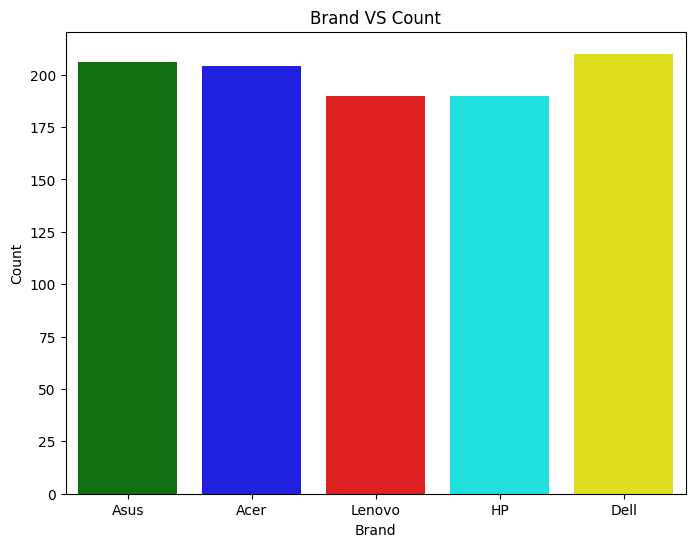

In [7]:
plt.figure(figsize=(8,6))
colors=["green","blue","red","cyan","yellow"]
sns.countplot(data=data,x="Brand",palette=colors,legend=False,hue="Brand")
plt.title("Brand VS Count")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()

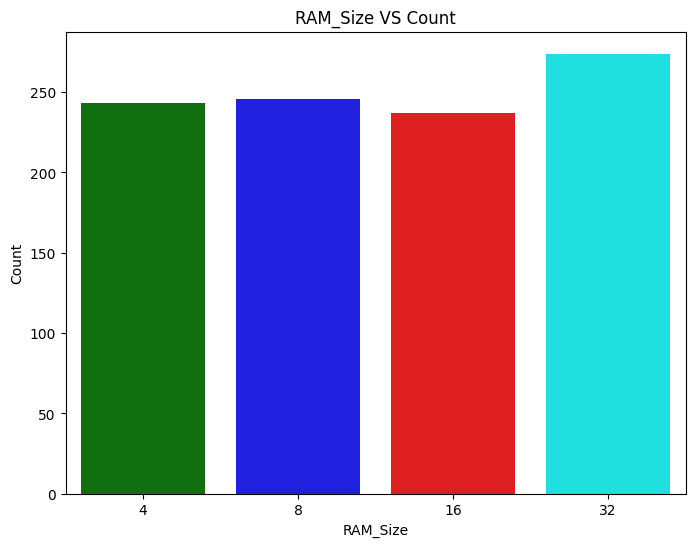

In [8]:
plt.figure(figsize=(8,6))
colors=["green","blue","red","cyan"]
sns.countplot(data=data,x="RAM_Size",palette=colors,legend=False,hue="RAM_Size")
plt.title("RAM_Size VS Count")
plt.xlabel("RAM_Size")
plt.ylabel("Count")
plt.show()

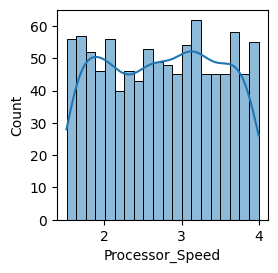

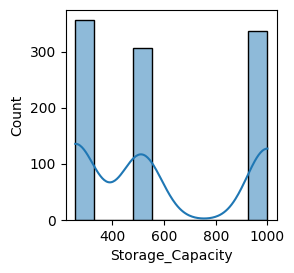

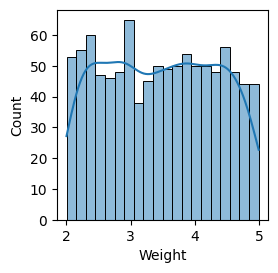

In [9]:
plt.figure(figsize=(6,6))
plt.subplot(2,2,1)
sns.histplot(data=data,x="Processor_Speed",bins=20,kde=True)
plt.show()

plt.figure(figsize=(6,6))
plt.subplot(2,2,2)
sns.histplot(data=data,x="Storage_Capacity",bins=10,kde=True)
plt.show()

plt.figure(figsize=(6,6))
plt.subplot(2,2,3)
sns.histplot(data=data,x="Weight",bins=20,kde=True)
plt.show()

In [10]:
data.columns

Index(['Brand', 'Processor_Speed', 'RAM_Size', 'Storage_Capacity',
       'Screen_Size', 'Weight', 'Price'],
      dtype='object')

In [11]:
numeric_cols=["Processor_Speed","RAM_Size","Storage_Capacity","Screen_Size","Weight","Price"]
x=data[numeric_cols]
y=data["Price"]

In [12]:
print(y)

0      17395.093065
1      31607.605919
2       9291.023542
3      17436.728334
4      32917.990718
           ...     
995    31593.668017
996     9149.521832
997    16552.404779
998     9407.473459
999     8807.696702
Name: Price, Length: 1000, dtype: float64


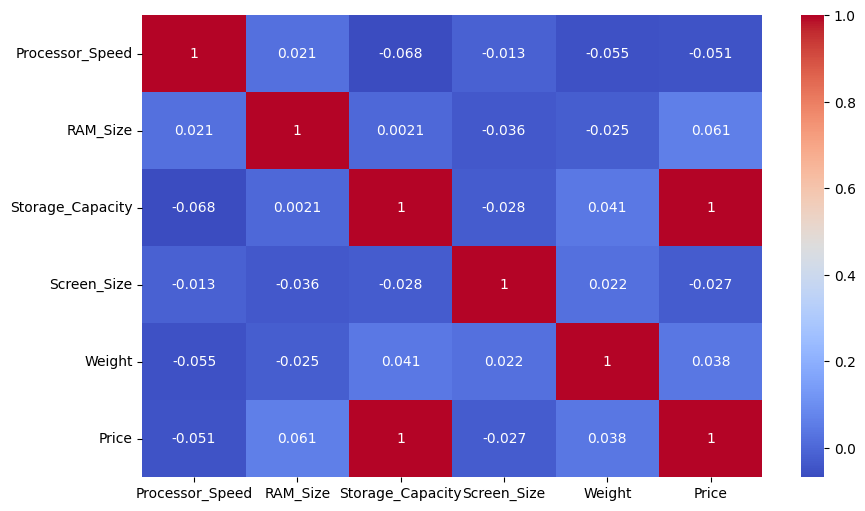

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(x.corr(),annot=True,cmap="coolwarm")
plt.show()

In [14]:
x.corr()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Processor_Speed,1.000000,0.021391,-0.067576,-0.013425,-0.054603,-0.050737
RAM_Size,0.021391,1.000000,0.002111,-0.036002,-0.025382,0.061237
Storage_Capacity,-0.067576,0.002111,1.000000,-0.027560,0.041335,0.997908
Screen_Size,-0.013425,-0.036002,-0.027560,1.000000,0.021995,-0.026740
Weight,-0.054603,-0.025382,0.041335,0.021995,1.000000,0.038417
Price,-0.050737,0.061237,0.997908,-0.026740,0.038417,1.000000


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 6)
(200, 6)
(800,)
(200,)


In [18]:
print(x_train)

     Processor_Speed  RAM_Size  Storage_Capacity  Screen_Size    Weight  \
29          3.799639         8              1000    12.853007  2.151678   
535         3.298004        16               512    15.144079  2.587267   
695         2.433129         4               512    15.046398  2.264456   
557         3.313144        32               512    12.836309  2.376126   
836         3.162279        16               512    14.701664  2.943887   
..               ...       ...               ...          ...       ...   
106         1.953589        32               256    14.320274  3.534916   
270         2.096943        16              1000    14.492863  4.989697   
860         2.884506         4              1000    11.458639  4.942381   
435         2.074887         4               256    15.417373  2.991174   
102         1.532505        32               256    13.582248  3.956279   

            Price  
29   31747.604606  
535  17515.915181  
695  17073.491966  
557  18399.777107  

In [19]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
y_pred=model.predict(x_test)

In [ ]:
print(y_pred)

In [23]:
#MAE
print(mean_absolute_error(y_test,y_pred))

2.3646862246096135e-12


In [24]:
print(mean_squared_error(y_test,y_pred))

9.661469554619363e-24


In [25]:
print(r2_score(y_test,y_pred))

1.0


In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
model1=RandomForestRegressor()
model1.fit(x_train,y_train)

RandomForestRegressor()

In [28]:
y_pred=model1.predict(x_test)

In [ ]:
print(y_pred)

In [30]:
#MAE,MSE,R2
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

8.27444638910065
515.0479015018617
0.9999943274508113


In [ ]:
print(len(y_test), len(y_pred), len(y_pred))

200 200 200


Text(0.5, 1.0, 'Training Scores Comparison')

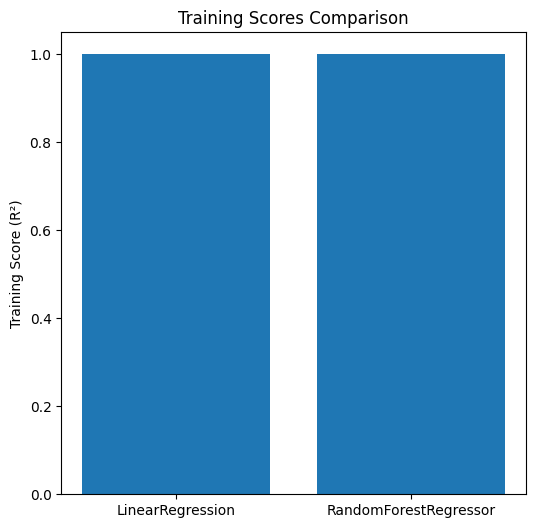

In [44]:
#TRAINING R2SCORES

plt.figure(figsize=(6,6))
mod = ["LinearRegression", "RandomForestRegressor"]
train_score = [model.score(x_train, y_train), model1.score(x_train, y_train)]
plt.bar(range(len(mod)), train_score)          # x = 0,1
plt.xticks(range(len(mod)), mod)               # labeling bars
plt.ylabel("Training Score (R²)")
plt.title("Training Scores Comparison")